In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
class KMeans:

    def __init__(self, K = 5, max_iters = 100):
        self.K          = K
        self.max_iters  = max_iters
        self.clusters   = [[]] * self.K 
        self.centroids  = []   
        
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters  = self.create_clusters(self.centroids)
            centroids_old  = self.centroids
            self.centroids = self.get_centroids(self.clusters)
            if self.is_converged(centroids_old, self.centroids):
                break

        return self.get_cluster_labels(self.clusters)

    def get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def closest_centroid(self, sample, centroids):
        distances = [self.euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def is_converged(self, centroids_old, centroids):
        distances = [self.euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0


In [3]:
np.random.seed(42)

X, y = make_blobs(centers       = 4, 
                  n_samples     = 500, 
                  n_features    = 2, 
                  shuffle       = True, 
                  random_state  = 40)

clusters = len(np.unique(y))

k = KMeans(K = clusters, max_iters = 150)
y_pred = k.predict(X)

In [4]:
df = pd.DataFrame(dict(x = X[:, 0], y = X[:, 1], label = y_pred))
df.head(10)

,x,y,label
0,-4.710204,-8.200208,3.0
1,0.909620,2.078220,2.0
2,-0.193633,-3.541595,0.0
3,5.340721,-3.679075,1.0
4,-0.158472,-9.939293,3.0
5,0.634796,1.830192,2.0
6,5.285100,-5.233614,1.0
7,-1.512305,-4.460829,0.0
8,-3.139489,-4.199506,0.0
9,5.208240,-3.457637,1.0


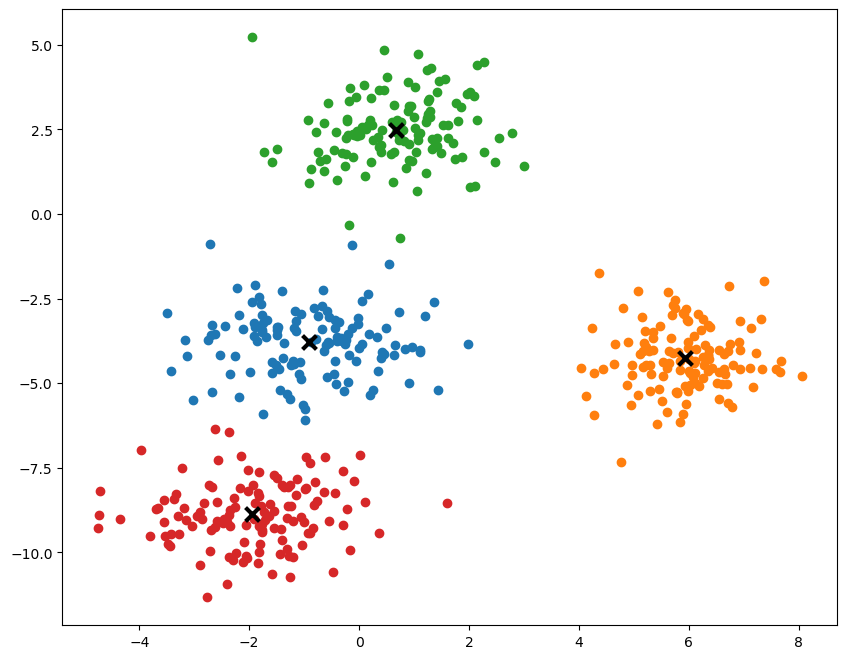

In [6]:
plt.figure(figsize = (10, 8))

for i, index in enumerate(k.clusters):
    point = X[index].T
    plt.scatter(*point)

for point in k.centroids:
    plt.scatter(*point, marker = 'x', s = 100, c = 'k', linewidth = 3)

plt.show()